In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import sklearn as svm
from tensorflow.keras.layers import Dense , BatchNormalization , Dropout ,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from sklearn.metrics import precision_score , recall_score , confusion_matrix , accuracy_score , f1_score , classification_report 

In [4]:
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [5]:
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


[Text(0, 0, '203')]

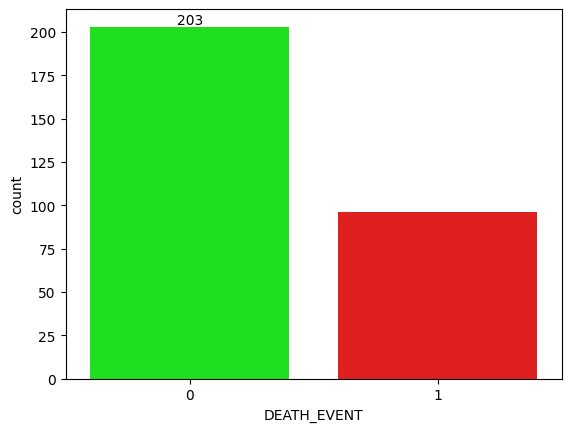

In [8]:
cols = ["#00FF00","#FF0000"]
ax = sns.countplot(data=data_df, x="DEATH_EVENT", hue="DEATH_EVENT", palette=cols, legend=False)
ax.bar_label(ax.containers[0])

In [9]:
data_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


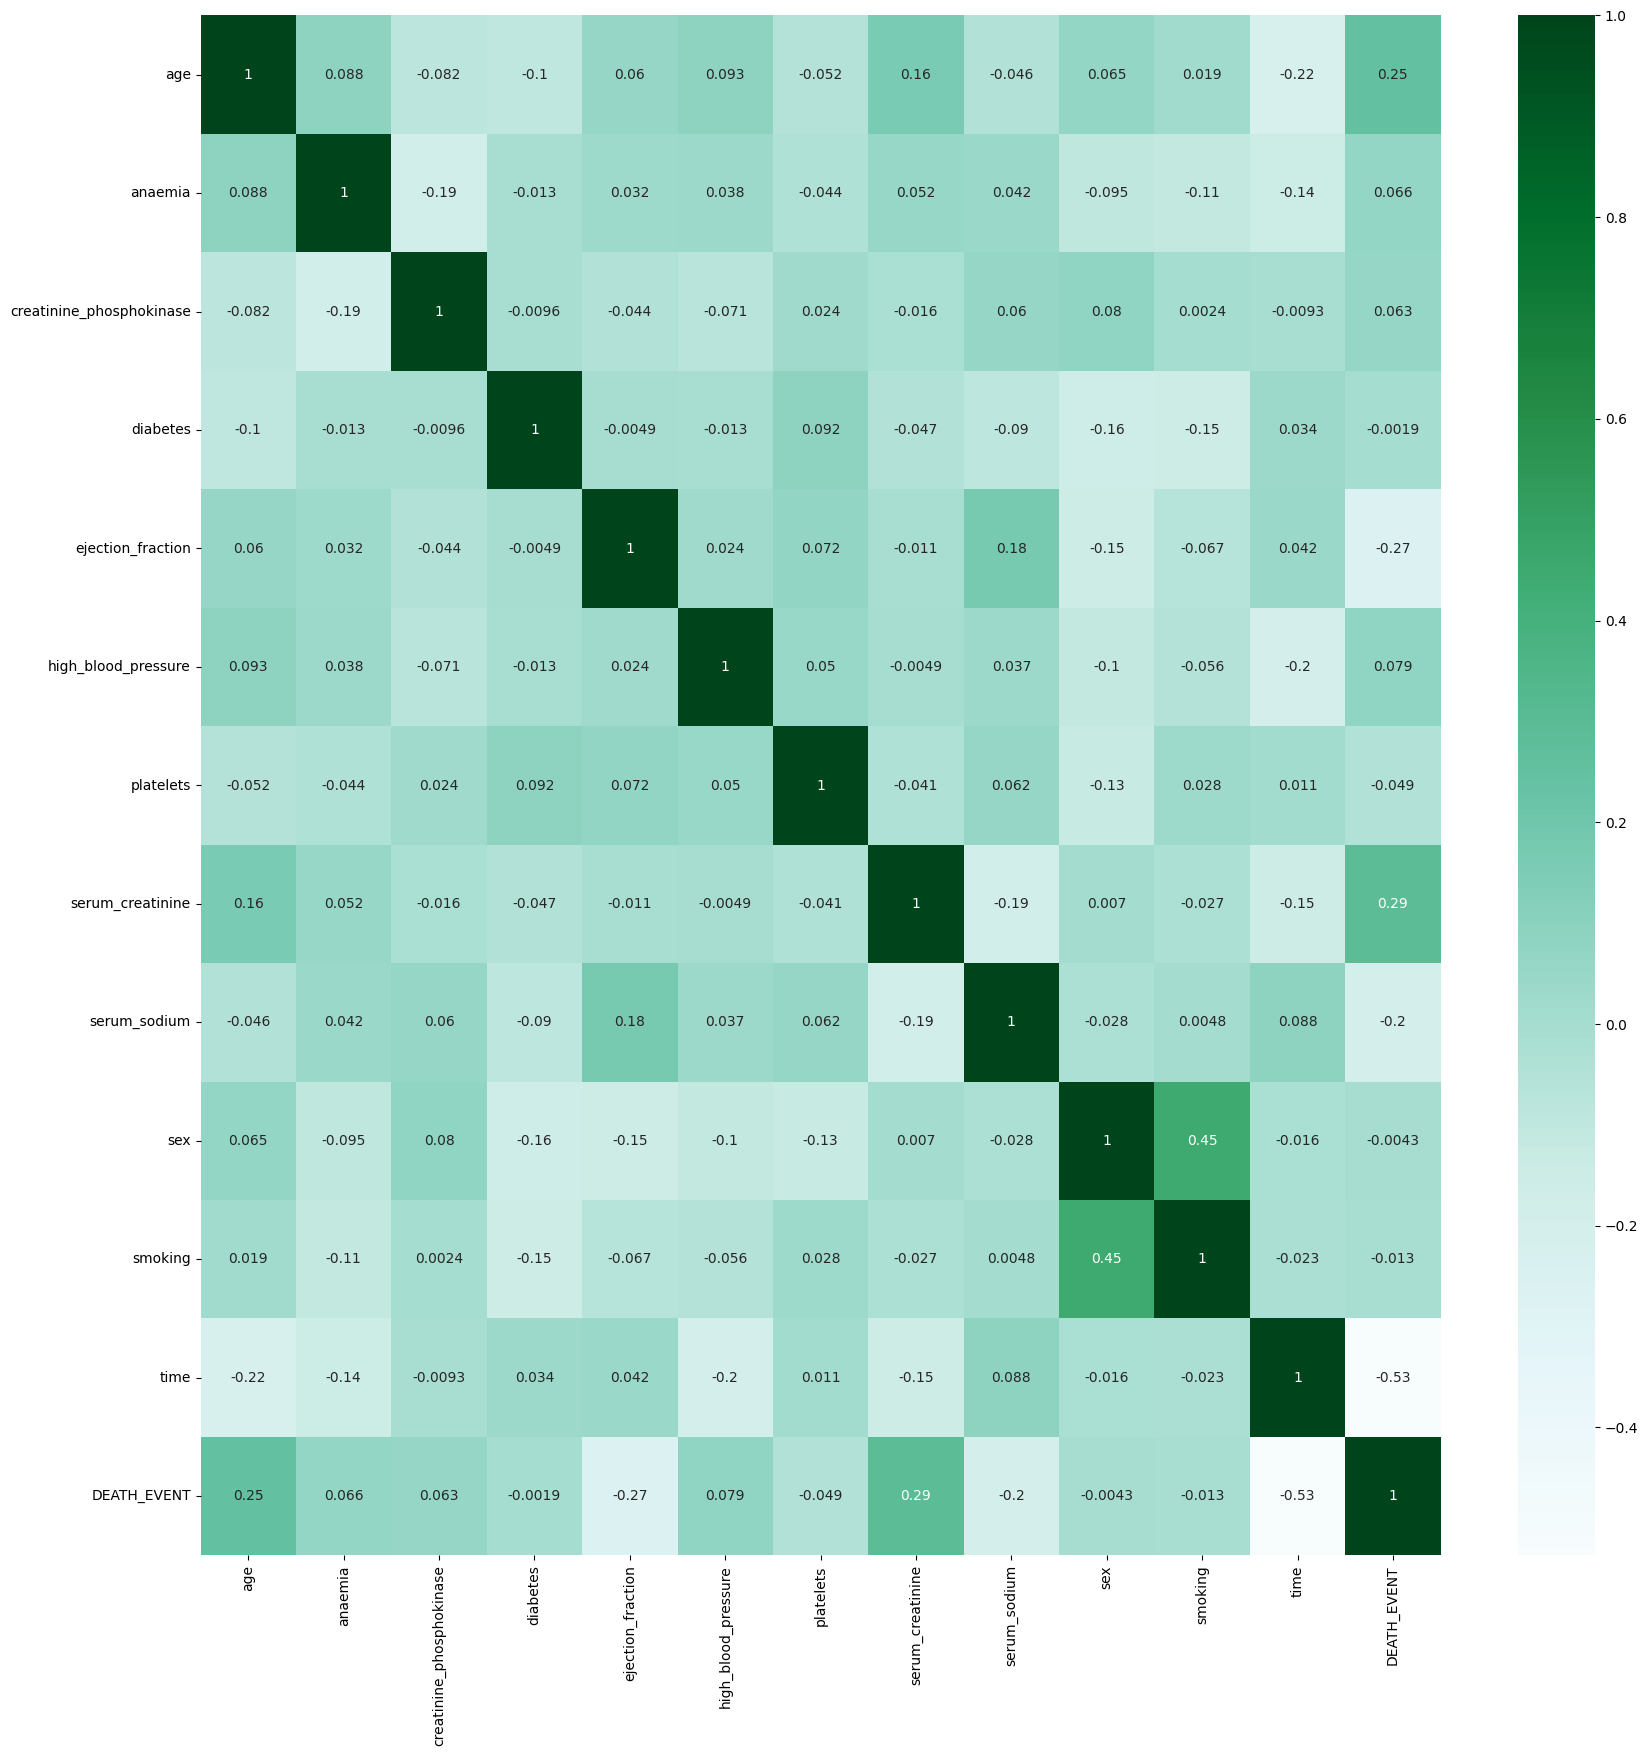

In [10]:
plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(), cmap="BuGn", annot=True)
plt.show()

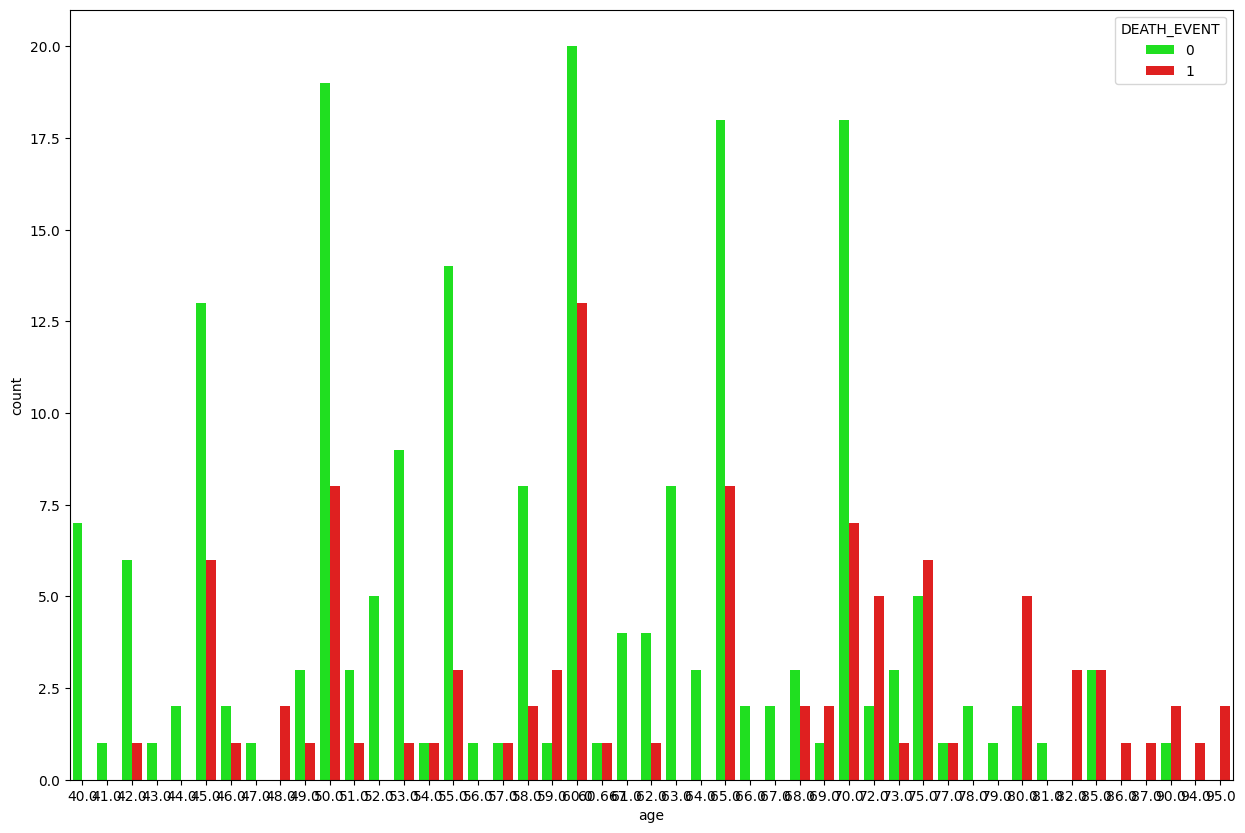

In [11]:
plt.figure(figsize=(15,10))
days_of_week = sns.countplot(x=data_df["age"],data=data_df, hue="DEATH_EVENT", palette=cols)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8748\4183475971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)


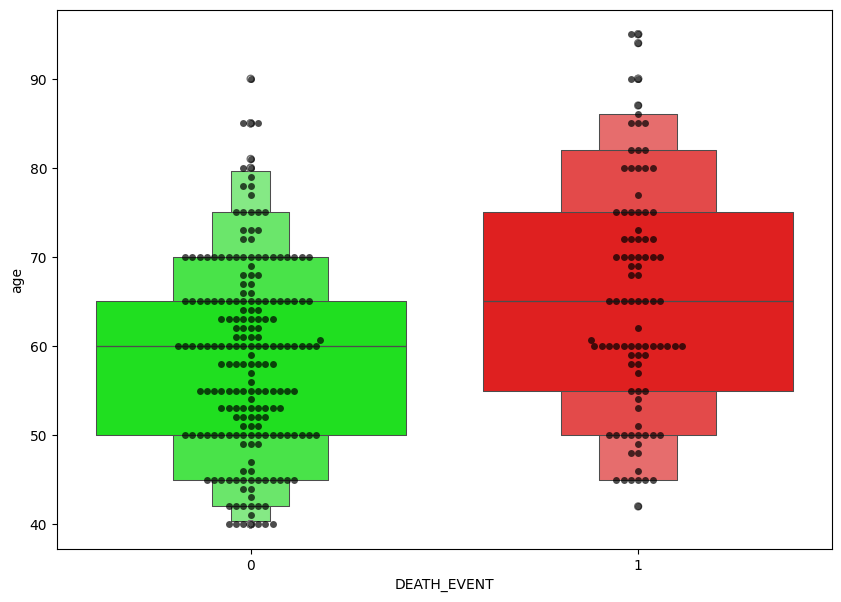

C:\Users\Dell\AppData\Local\Temp\ipykernel_8748\4183475971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


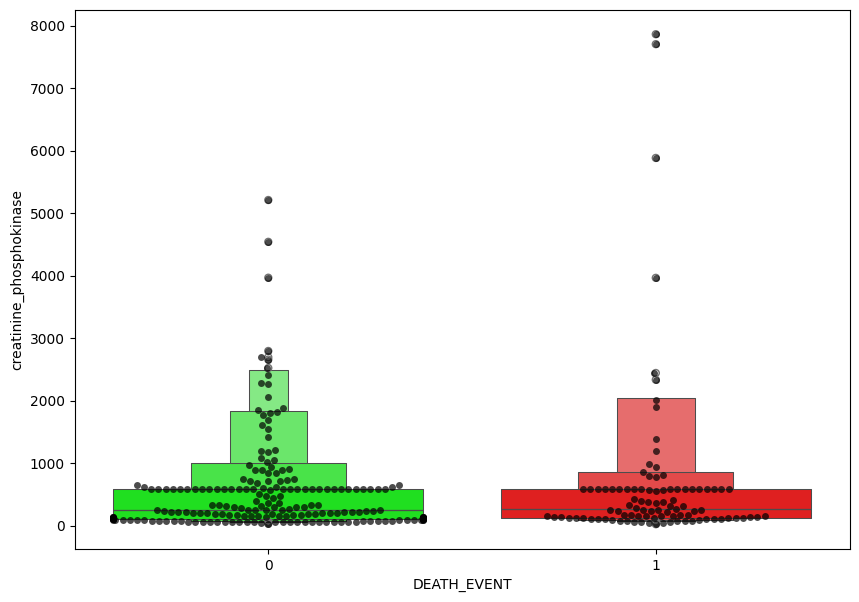

C:\Users\Dell\AppData\Local\Temp\ipykernel_8748\4183475971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)


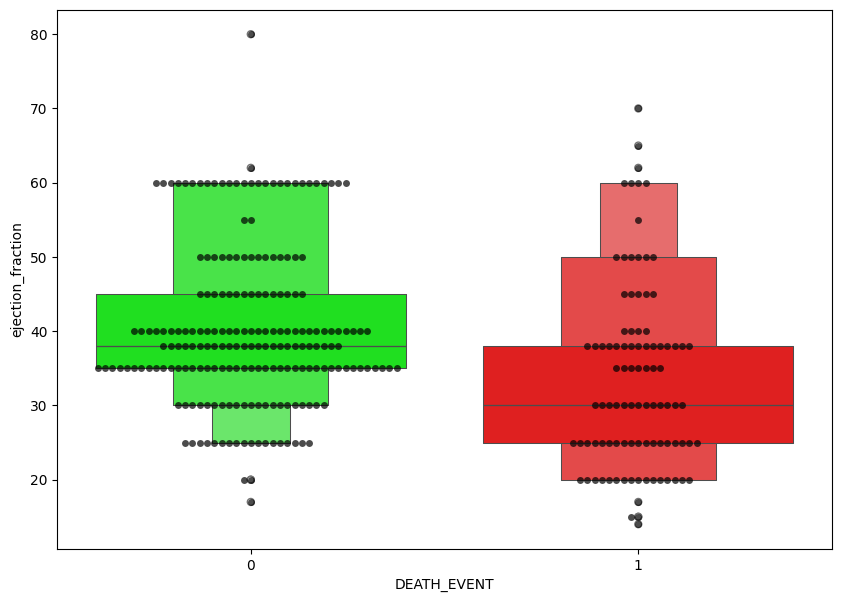

C:\Users\Dell\AppData\Local\Temp\ipykernel_8748\4183475971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)


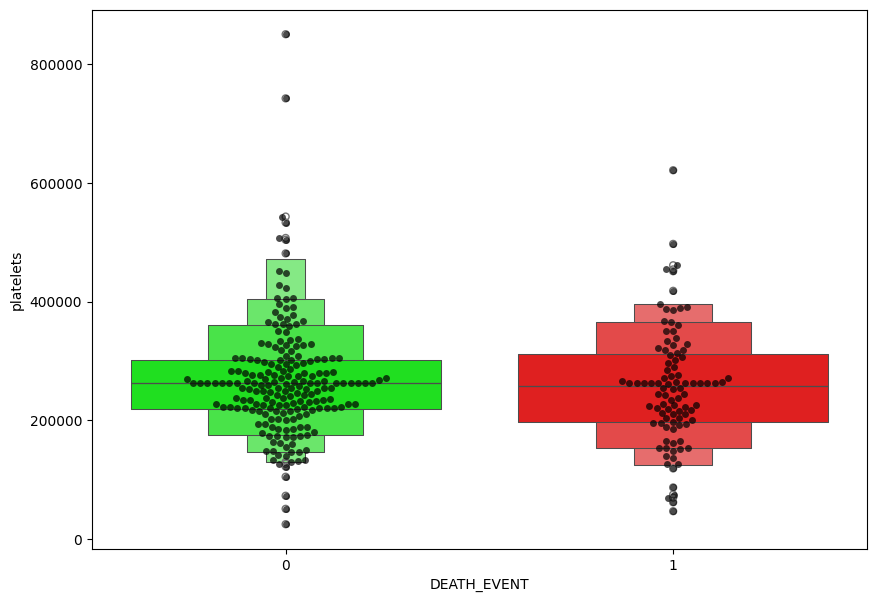

C:\Users\Dell\AppData\Local\Temp\ipykernel_8748\4183475971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


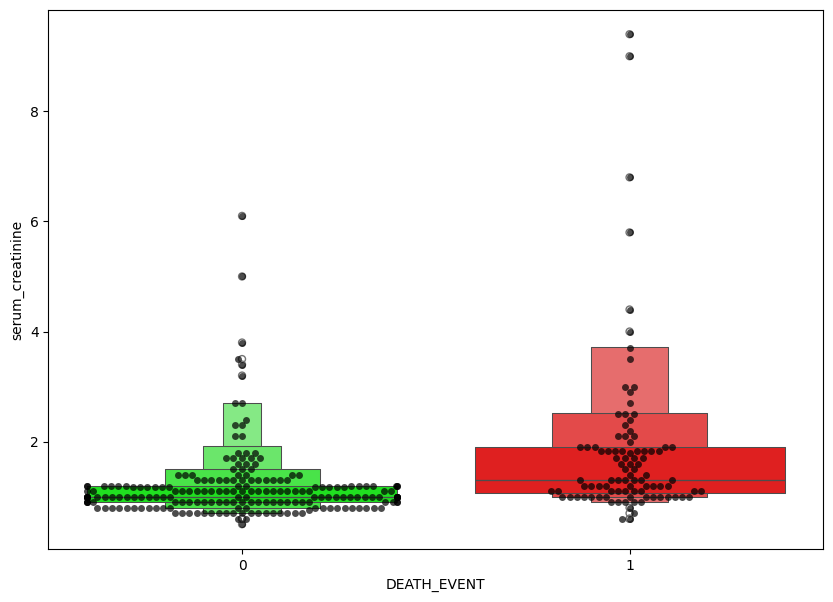

C:\Users\Dell\AppData\Local\Temp\ipykernel_8748\4183475971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)


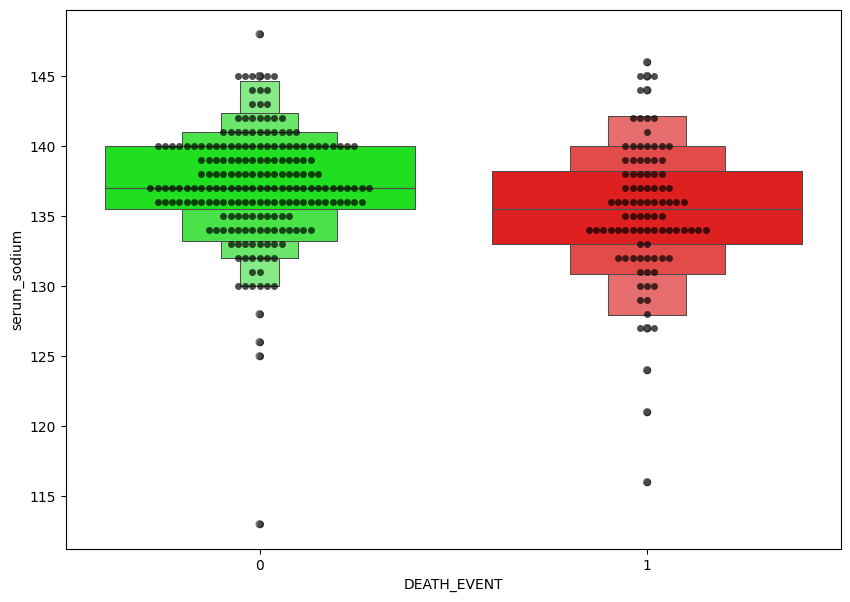

C:\Users\Dell\AppData\Local\Temp\ipykernel_8748\4183475971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)


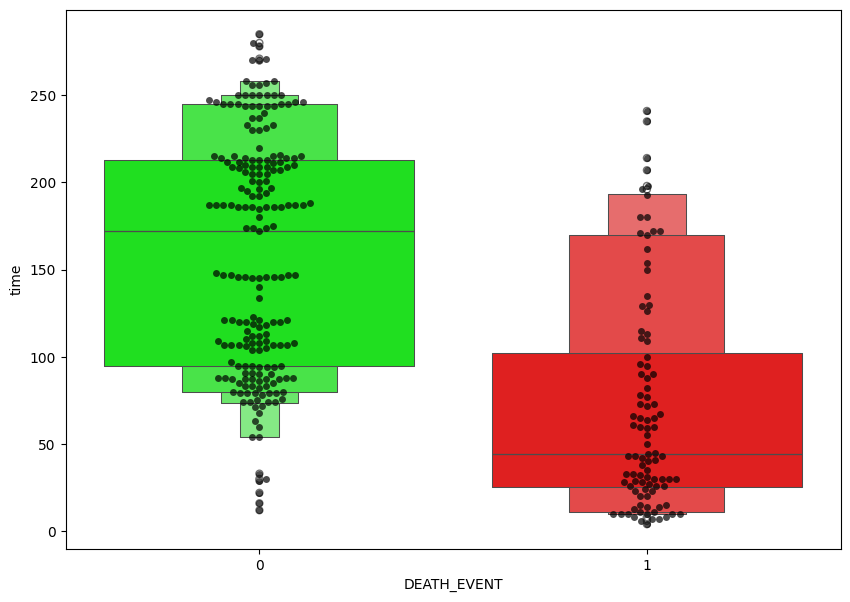

In [12]:
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

for i in feature :
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"],y=data_df[i],color="black",alpha=0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"],y=data_df[i],palette=cols)
    plt.show()

In [13]:
X = data_df.drop(["DEATH_EVENT"] ,  axis= 1)
Y = data_df["DEATH_EVENT"]                                  

In [14]:
col_name = list(X.columns)

s_scaler = preprocessing.StandardScaler()
X_scaled =  s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_name)

X_scaled.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.703353e-16,1.009969e-16,0.000000,9.060014e-17,-3.267546e-17,0.000000,7.723291e-17,1.425838e-16,-8.673849e-16,-8.911489e-18,-1.188199e-17,-1.901118e-16
std,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-8.711048e-01,-0.576918,-8.475794e-01,-2.038387e+00,-0.735688,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.359272e+00,-6.876819e-01,-1.629502e+00
25%,-8.281242e-01,-8.711048e-01,-0.480393,-8.475794e-01,-6.841802e-01,-0.735688,-5.208700e-01,-4.782047e-01,-5.959961e-01,-1.359272e+00,-6.876819e-01,-7.389995e-01
50%,-7.022315e-02,-8.711048e-01,-0.342574,-8.475794e-01,-7.076750e-03,-0.735688,-1.390846e-02,-2.845524e-01,8.503384e-02,7.356882e-01,-6.876819e-01,-1.969543e-01
75%,7.718891e-01,1.147968e+00,0.000166,1.179830e+00,5.853888e-01,1.359272,4.111199e-01,5.926150e-03,7.660638e-01,7.356882e-01,1.454161e+00,9.387595e-01
max,2.877170e+00,1.147968e+00,7.514640,1.179830e+00,3.547716e+00,1.359272,6.008180e+00,7.752020e+00,2.582144e+00,7.356882e-01,1.454161e+00,1.997038e+00


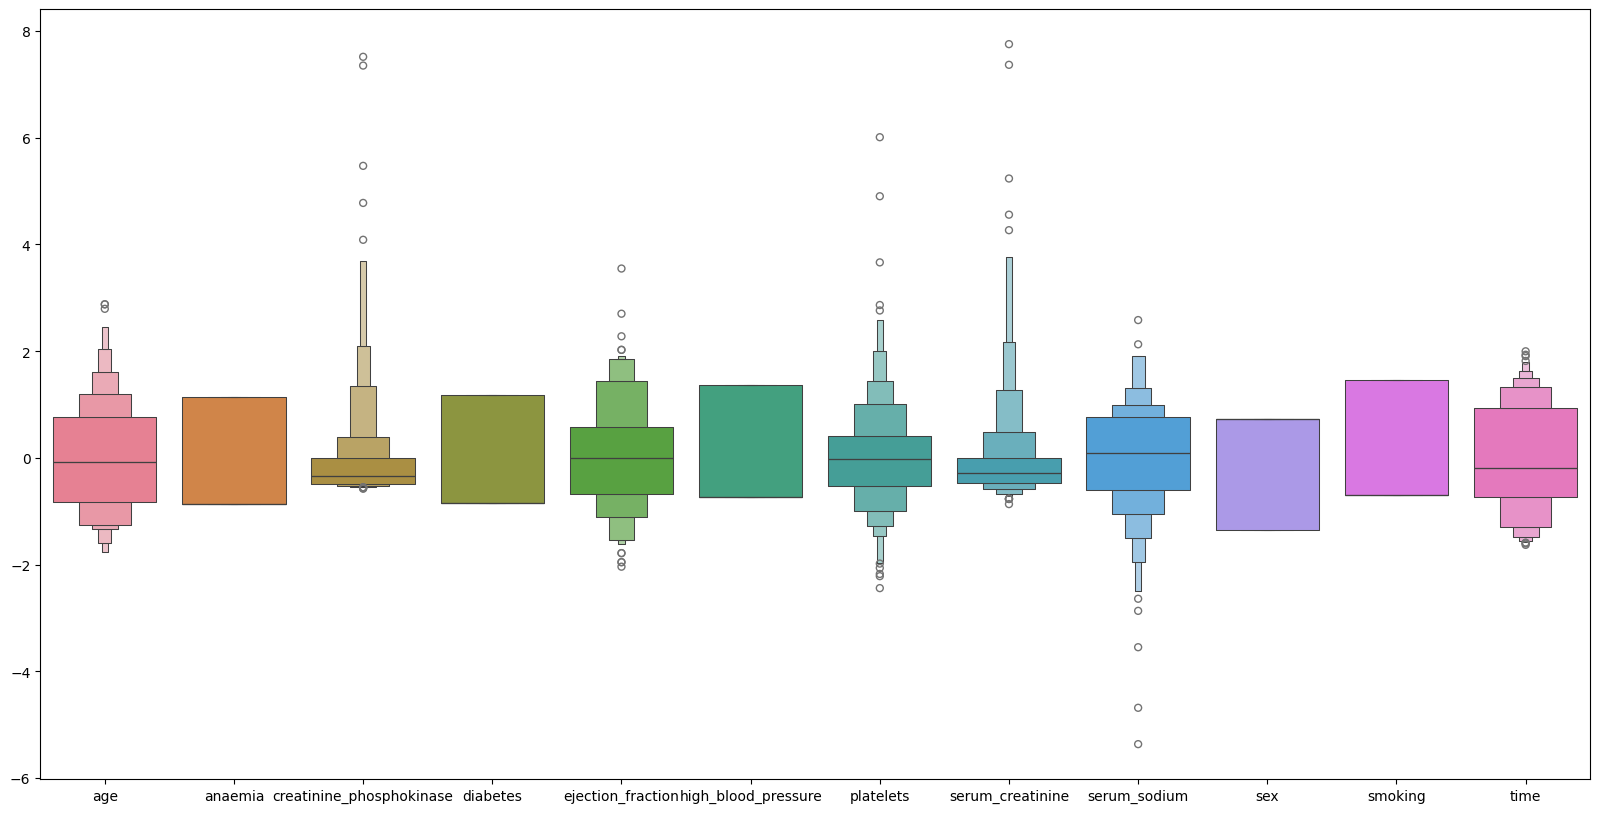

In [15]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=X_scaled)
plt.show()

In [16]:
X_train , X_test , Y_train ,Y_test = train_test_split(X_scaled , Y, test_size = 0.3)

In [17]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (209, 12)
X_test shape: (90, 12)
Y_train shape: (209,)
Y_test shape: (90,)


In [18]:
from sklearn.svm import SVC  # Correct import

model1 = SVC()

In [19]:
model1.fit(X_train,Y_train)

SVC()

In [20]:
y_pred = model1.predict(X_test)

In [21]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1])

In [22]:
Y_test

37     1
207    0
94     0
187    1
215    0
      ..
208    0
47     1
237    0
189    0
54     1
Name: DEATH_EVENT, Length: 90, dtype: int64

In [23]:
Y_train

137    0
278    0
103    0
246    1
202    0
      ..
295    0
115    0
16     1
119    1
197    0
Name: DEATH_EVENT, Length: 209, dtype: int64

In [24]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        57
           1       0.89      0.48      0.63        33

    accuracy                           0.79        90
   macro avg       0.83      0.72      0.74        90
weighted avg       0.81      0.79      0.77        90



In [25]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.01,patience = 20 , restore_best_weights=True) 
model = Sequential() 
model.add(Dense(units= 16,kernel_initializer = 'uniform',activation='relu',input_dim = 12)) 
model.add(Dense(units= 8,kernel_initializer = 'uniform',activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(units= 8,kernel_initializer = 'uniform',activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(units= 1,kernel_initializer = 'uniform',activation='sigmoid'))

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, Y_train, batch_size=25, epochs=100, callbacks=[early_stopping], validation_split=0.25)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6004 - loss: 0.6928 - val_accuracy: 0.7170 - val_loss: 0.6917
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7156 - loss: 0.6914 - val_accuracy: 0.7170 - val_loss: 0.6902
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6840 - loss: 0.6904 - val_accuracy: 0.7170 - val_loss: 0.6889
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6850 - loss: 0.6893 - val_accuracy: 0.7170 - val_loss: 0.6875
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6707 - loss: 0.6884 - val_accuracy: 0.7170 - val_loss: 0.6861
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6736 - loss: 0.6874 - val_accuracy: 0.7170 - val_loss: 0.6845
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6933 - loss: 0.6849 - val_accuracy: 0.7170 - val_loss: 0.6829
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6911 - loss: 0.6839 - val_accuracy: 0.7170 - val_loss:

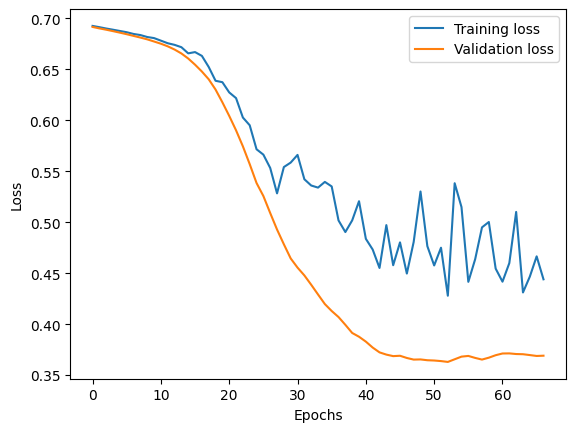

In [29]:
history_df = pd.DataFrame(history.history)  # Convert history to DataFrame

plt.plot(history_df.loc[:,['loss']], label="Training loss")  # Correct selection
plt.plot(history_df.loc[:,['val_loss']], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

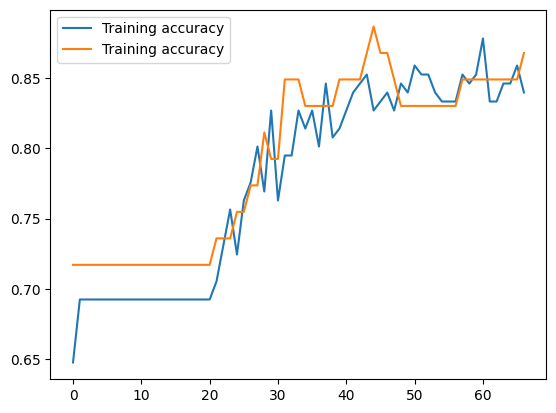

In [30]:
plt.plot(history_df.loc[:,['accuracy']],label = "Training accuracy")
plt.plot(history_df.loc[:,['val_accuracy']],label = "Training accuracy")
plt.legend()

In [31]:
y_pred= model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step 


In [32]:
y_pred = (y_pred > 0.5)

In [33]:
print(classification_report(Y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        57
           1       0.86      0.58      0.69        33

    accuracy                           0.81        90
   macro avg       0.83      0.76      0.78        90
weighted avg       0.82      0.81      0.80        90

